In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import initializers

import matplotlib.pyplot as plt
import numpy as np

### Task 2.1 Create GAN for *fashion_mnist* data

In [12]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print(x_train.shape[0], 'train samples')
print('image shape', x_train[0].shape)
height, width = x_train[0].shape[0], x_train[0].shape[1]

60000 train samples
image shape (28, 28)


(60000, 28, 28)

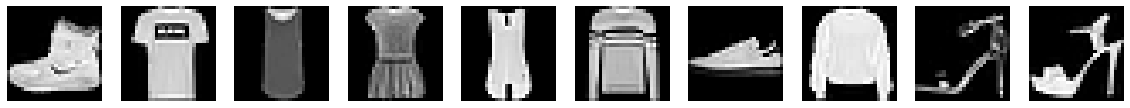

In [ ]:
plt.figure(figsize=(20, 5))
n = 10
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i])
    plt.gray()
    plt.axis('off')

plt.show()

In [ ]:
img_dim = height * width
x_train = x_train.reshape(60000, img_dim)
print('input shape: ', x_train.shape[1])
x_train = (x_train.astype(np.float32) - 127.5) / 127.5 

input shape:  784


In [ ]:
gen_input_dim = 200

optim = keras.optimizers.Adam(learning_rate=0.0025, beta_1=0.5) 

def build_discriminator():
    model =  keras.Sequential()
    model.add(layers.Dense(1024, input_dim=img_dim, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dropout(0.3))
        
    model.add(layers.Dense(512))
    model.add(layers.ReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Dense(256))
    model.add(layers.ReLU())
    model.add(layers.Dropout(0.3))
    
    model.add(layers.Dense(144))
    model.add(layers.LeakyReLU(alpha=0.2))
        
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optim)
    return model




def build_generator():
    model =  keras.Sequential()
    model.add(layers.Dense(144, input_dim=gen_input_dim, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
    model.add(layers.LeakyReLU(alpha=0.2))

    model.add(layers.Dense(256))
    model.add(layers.LeakyReLU(alpha=0.2))
    
    model.add(layers.Dense(512))
    model.add(layers.LeakyReLU(alpha=0.2))
    
    model.add(layers.Dense(1024))
    model.add(layers.LeakyReLU(alpha=0.2))
    
    model.add(layers.Dense(img_dim, activation='tanh'))
    model.compile(loss='binary_crossentropy', optimizer=optim)
    return model  

In [ ]:
discrim_losses = []

def plot_generated_images(epoch, generator):
    num_of_images = 10  # num of classes
    noise = np.random.normal(0, 1, size=[num_of_images, gen_input_dim])
    generated_images=generator.predict(noise).reshape(num_of_images, 28, 28)
    plt.figure(figsize=(10, 5))
    for i in range(num_of_images):
        plt.subplot(1, num_of_images, i+1)
        plt.imshow(generated_images[i], cmap = 'gray')
        plt.axis('off')
        plt.tight_layout()
    plt.show()


def train_model(epochs, batch_size):
    num_batches = int(x_train.shape[0]/batch_size)
    for ep in range(epochs+1):
        for i in range(num_batches):
            noise = np.random.normal(0, 1, size=[batch_size, gen_input_dim]) # create noise images for generator
            image_batch = x_train[np.random.randint(0, x_train.shape[0], size=batch_size)] # get random images from dataset for descreminator
            
            generated_images = generator.predict(noise)
            X = np.concatenate([image_batch, generated_images])

            y_dis = np.zeros(2*batch_size)
            y_dis[:batch_size] = 1.0  

            discriminator.trainable = True
            d_loss = discriminator.train_on_batch(X, y_dis)
            discrim_losses.append(d_loss)

            noise = np.random.normal(0, 1, size=[batch_size, gen_input_dim])
            y_gen = np.ones(batch_size)
            discriminator.trainable = False
            gan.train_on_batch(noise, y_gen)
        if ep % 10 == 0:
            print('epoch: ', ep)
            plot_generated_images(ep, generator)

In [ ]:
#init discriminator and generator
discriminator = build_discriminator()
generator = build_generator()

# Combined discriminator and generator
discriminator.trainable = False
gan_input = keras.Input(shape=(gen_input_dim,))
gen_model = generator(gan_input)
gan_output = discriminator(gen_model)

gan = keras.Model(inputs=gan_input, outputs=gan_output)
gan.compile(loss='binary_crossentropy', optimizer='adam')

gan.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 200)]             0         
                                                                 
 sequential_39 (Sequential)  (None, 784)               1526560   
                                                                 
 sequential_38 (Sequential)  (None, 1)                 1497121   
                                                                 
Total params: 3,023,681
Trainable params: 1,526,560
Non-trainable params: 1,497,121
_________________________________________________________________


epoch:  0


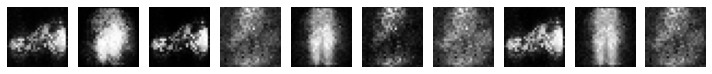

epoch:  10


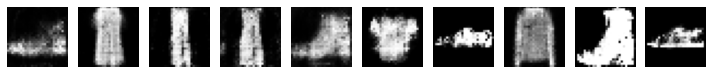

epoch:  20


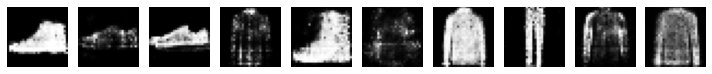

epoch:  30


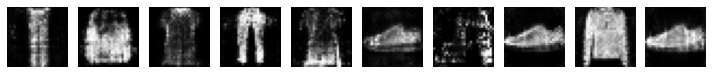

epoch:  40


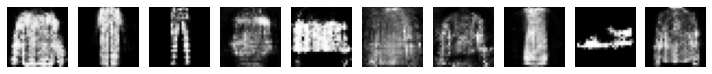

In [ ]:
epochs = 50
batch_size = 128
train_model(epochs, batch_size)

### Task 2.2 Create DCGAN on fashion mnist dataset

In [2]:
#tried to train model on RGB datasets
#this cell to load images from internal path

# import os
# import zipfile
# from PIL import Image

# def create_img_dataset(prefix_dir, classes):
#   image_list = []
#   label_list = []
#   plt.figure(figsize = (20, 5))
#   for class_num, class_dir in enumerate(classes):
#     for i, item in enumerate(os.listdir(prefix_dir + class_dir)):
#       if item == '.ipynb_checkpoints' or item == '.DS_Store' or item =='No Mask121.jpg':
       
#         continue
#       image = Image.open(prefix_dir + class_dir + '/' + item)\
#                   .convert('RGB')\
#                   .resize((height, width))
#       img_tenzor = (np.array(image)- 127.5) / 127.5 
#       img_tenzor = img_tenzor.astype('float32')
#       image_list.append(img_tenzor)
#       label_list.append(class_num)
      
#       if i == 10:
#         ax = plt.subplot(2, len(classes), class_num + 1)
#         plt.axis("off")
#         ax.title.set_text(f"class {class_dir}")
#         plt.imshow(img_tenzor)
#   plt.show()

#   label_list = tf.keras.utils.to_categorical(label_list, len(classes))
#   image_list = np.clip(image_list, -1, 1)
#   image_list = np.array(image_list, dtype='float32')
#   return image_list, label_list

In [16]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print(x_train.shape[0], 'train samples')

60000 train samples


In [17]:
x_train = (x_train.astype(np.float32) - 127.5) / 127.5 

#reshape images to pass than to the model
x_train = np.reshape(x_train, (x_train.shape[0], 28,28,1))

x_train = x_train[:40000] # not to use the whole dataset
height, width, channels = x_train[0].shape[0], x_train[0].shape[1], x_train[0].shape[2]
total_shape = (height, width, channels)
print(f'image shape {total_shape}')

image shape (28, 28, 1)


In [18]:
adam = keras.optimizers.Adam(learning_rate=0.00025, beta_1=0.5)


def build_discriminator_cnn():
    model = keras.Sequential()
   
    model.add(layers.Conv2D(32, (3,3), input_shape=total_shape))
    model.add(layers.LeakyReLU(alpha=0.2))

    model.add(layers.Conv2D(64, (3,3), strides=(2,2)))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (3,3), strides=(2,2)))
    model.add(layers.LeakyReLU(alpha=0.2))

    model.add(layers.Conv2D(256, (3,3), padding='same'))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dropout(0.4))
    model.add(layers.Dense(1, activation='sigmoid'))
    # compile model
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model


def build_generator_cnn():
    model = keras.Sequential()
    # foundation for 8x8 image
    init_shape = (7, 7, 128)
    model.add(layers.Dense(init_shape[0]*init_shape[1]*init_shape[2], input_dim=gen_input_dim))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Reshape(init_shape))
    if width >= 14:
      # upsample to 14x14
      model.add(layers.Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
      model.add(layers.LeakyReLU(alpha=0.2))
    if width >= 28:
      # upsample to 28x28
      model.add(layers.Conv2DTranspose(64, (4,4), strides=(2,2), padding='same'))
      model.add(layers.LeakyReLU(alpha=0.2))

 #tried for other images     
    if width >= 64:
      # upsample to 64x64
      model.add(layers.Conv2DTranspose(64, (4,4), strides=(2,2), padding='same'))
      model.add(layers.LeakyReLU(alpha=0.2))
    if width >= 128:
      # upsample to 128x128
      model.add(layers.UpSampling2D())
      model.add(layers.LeakyReLU(alpha=0.2))


    # output layer
    model.add(layers.Conv2D(1, (3,3), padding='same', activation='tanh'))
    return model  

In [19]:
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = keras.Sequential()
    model.add(generator)
    model.add(discriminator)
    model.compile(loss='binary_crossentropy', optimizer=adam)
    model.summary()
    return model

In [20]:
def plot_generated_images(epoch, generator):
    num_of_images = 7
    noise = np.random.normal(0, 1, size=[num_of_images, gen_input_dim])
    generated_images=generator.predict(noise)
    #return the initial shape to plot images
    generated_images = np.reshape(generated_images, (generated_images.shape[0], 28, 28))
    
    plt.figure(figsize=(10, 5))
    for i in range(num_of_images):
        plt.subplot(1, num_of_images, i+1)
        plt.imshow(generated_images[i])
        plt.axis('off')
        plt.tight_layout()
    plt.show()

In [21]:
discrim_losses = []

def train_model(epochs, batch_size, generator, discriminator, gan):
    num_batches = int(x_train.shape[0]/batch_size)
    for ep in range(epochs+1):
        for i in range(num_batches):
            noise = np.random.normal(0, 1, size=[batch_size, gen_input_dim])  # create noise images for generator
            image_batch = x_train[np.random.randint(0, x_train.shape[0], size=batch_size)] # get images for discriminator

            generated_images = generator.predict(noise)
            
            X = np.concatenate([image_batch, generated_images])
            y_dis = np.zeros(2*batch_size)
            y_dis[:batch_size] = 0.9  
            
            # Train discriminator
            discriminator.trainable = True
            d_loss, _ = discriminator.train_on_batch(X, y_dis)
            discrim_losses.append(d_loss)

            # Train generator
            noise = np.random.normal(0, 1, size=[batch_size, gen_input_dim])
            y_gen = np.ones(batch_size)
            discriminator.trainable = False
            gan.train_on_batch(noise, y_gen)
        if ep % 5 == 0:
            print('epoch: ', ep+1)
            plot_generated_images(ep, generator)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_6 (Sequential)   (None, 28, 28, 1)         1027457   
                                                                 
 sequential_7 (Sequential)   (None, 1)                 394241    
                                                                 
Total params: 1,421,698
Trainable params: 1,027,457
Non-trainable params: 394,241
_________________________________________________________________
epoch:  1


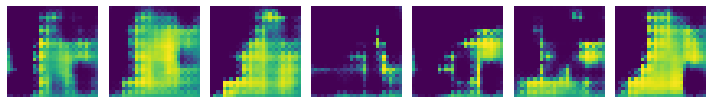

epoch:  6


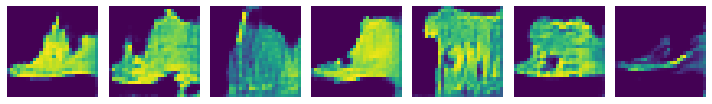

epoch:  11


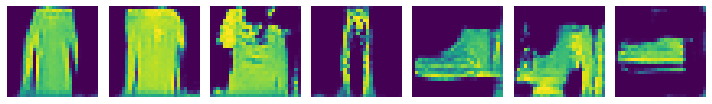

epoch:  16


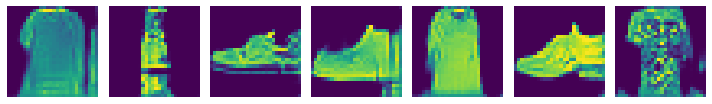

epoch:  21


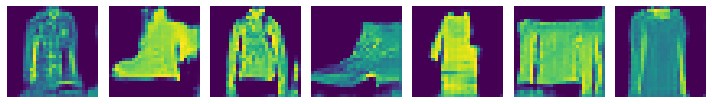

epoch:  26


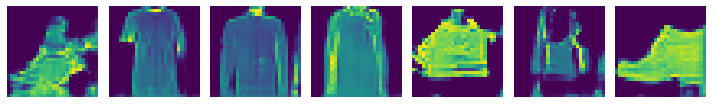

epoch:  31


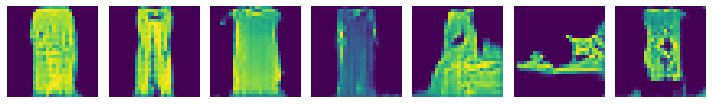

epoch:  36


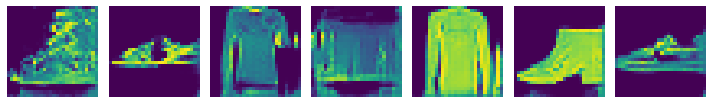

epoch:  41


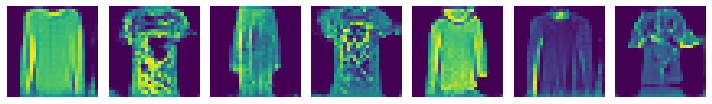

epoch:  46


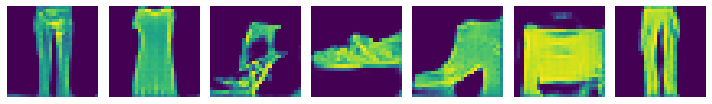

epoch:  51


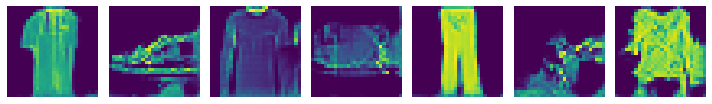

epoch:  56


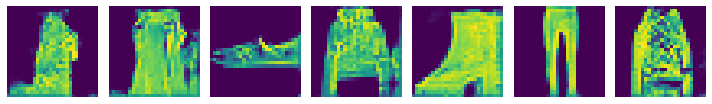

epoch:  61


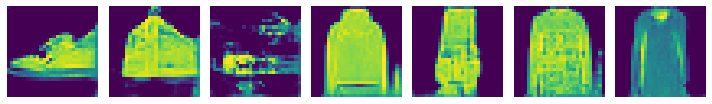

In [22]:
gen_input_dim = 100
generator = build_generator_cnn()
discriminator = build_discriminator_cnn()
gan = build_gan(generator, discriminator)

epochs = 60
batch_size = 128
train_model(epochs, batch_size, generator, discriminator, gan)

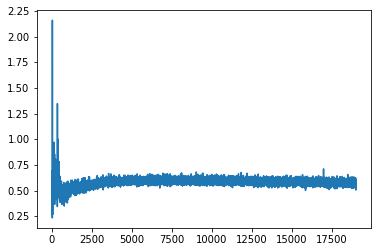

In [23]:
plt.plot(discrim_losses)